### PART-1

#### Importing and Data processing

In [41]:
!pip install hyperas
!pip install joblib



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import warnings
warnings.simplefilter("ignore")

# for bokeh plotting
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_file
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

# for chi-square
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats

# machine learning
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_path = '/content/drive/My Drive/Dataset/'


####  Features

In [5]:
import pandas as pd

fea = []
with open(base_path+ 'features.txt') as f:
    for line in f:
        fea.append(line.split()[1])

l = pd.DataFrame(fea, columns=['Feature'])
print(l)

                                  Feature
0                       tBodyAcc-mean()-X
1                       tBodyAcc-mean()-Y
2                       tBodyAcc-mean()-Z
3                        tBodyAcc-std()-X
4                        tBodyAcc-std()-Y
..                                    ...
556      angle(tBodyGyroMean,gravityMean)
557  angle(tBodyGyroJerkMean,gravityMean)
558                  angle(X,gravityMean)
559                  angle(Y,gravityMean)
560                  angle(Z,gravityMean)

[561 rows x 1 columns]


#### Train data

In [6]:
# Loading the training data
train_df = pd.read_csv(base_path + "train/X_train.txt", delim_whitespace=True)
train_df1 = pd.read_csv(base_path + "train/y_train.txt")

# Dealing with missing data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_df)
train_df[:] = imputer.transform(train_df)

# 'l' is correctly populated with feature names in one column
train_df.columns = l.iloc[:, 0].values  # Use iloc to access the first column data if it's a single column DataFrame

# Displaying the first few rows
print(train_df.head(5))


   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

NOTE:- There are total 561 features so we need to select features out of them based on importance for better
        understanding of data.

##### Extracting important features.

In [7]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(train_df,train_df1)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00921
Feature: 1, Score: -0.03097
Feature: 2, Score: 0.00704
Feature: 3, Score: -0.33834
Feature: 4, Score: 0.25738
Feature: 5, Score: 0.06384
Feature: 6, Score: -0.24953
Feature: 7, Score: 0.23554
Feature: 8, Score: 0.00296
Feature: 9, Score: -0.38310
Feature: 10, Score: 0.09886
Feature: 11, Score: -0.07682
Feature: 12, Score: 0.12450
Feature: 13, Score: -0.00460
Feature: 14, Score: -0.04194
Feature: 15, Score: -0.07447
Feature: 16, Score: -0.31841
Feature: 17, Score: -0.00453
Feature: 18, Score: -0.03981
Feature: 19, Score: -0.07734
Feature: 20, Score: 0.07480
Feature: 21, Score: -0.16035
Feature: 22, Score: 0.42972
Feature: 23, Score: -0.03539
Feature: 24, Score: -0.01222
Feature: 25, Score: -0.19134
Feature: 26, Score: 0.27717
Feature: 27, Score: 0.12125
Feature: 28, Score: -0.28994
Feature: 29, Score: -0.02825
Feature: 30, Score: 0.06827
Feature: 31, Score: -0.05431
Feature: 32, Score: 0.14696
Feature: 33, Score: 0.05484
Feature: 34, Score: 0.09338
Feature: 35

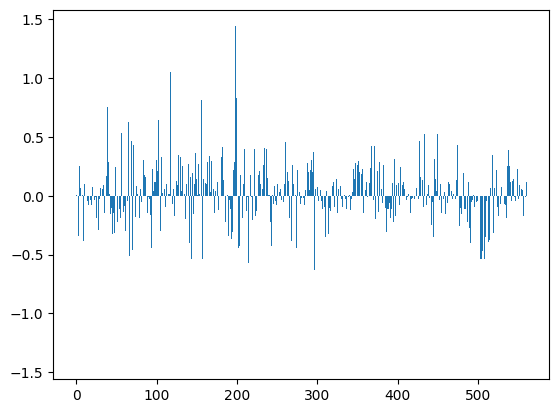

In [8]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [9]:
# Creating columns in train data
activity_df = pd.read_csv(base_path+ "train/y_train.txt", header=None)
activity = activity_df.squeeze()  # Convert DataFrame to Series if it has only one column
train_df['activity'] = activity
subject_id_df = pd.read_csv(base_path+ "train/subject_train.txt", header=None)
train_df['subject_id'] = subject_id_df.squeeze()  # Convert DataFrame to Series if it has only one column
label_name = activity.map({1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LYING"})
train_df["activity_name"] = label_name

# Displaying the newly created columns
print(train_df[train_df.columns[-3:]])


      activity  subject_id     activity_name
0            5           1          STANDING
1            5           1          STANDING
2            5           1          STANDING
3            5           1          STANDING
4            5           1          STANDING
...        ...         ...               ...
7346         2          30  WALKING_UPSTAIRS
7347         2          30  WALKING_UPSTAIRS
7348         2          30  WALKING_UPSTAIRS
7349         2          30  WALKING_UPSTAIRS
7350         2          30  WALKING_UPSTAIRS

[7351 rows x 3 columns]


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Columns: 564 entries, tBodyAcc-mean()-X to activity_name
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


#### Test data

In [11]:
# Define the base path
base_path = '/content/drive/My Drive/Dataset/'

# Reading test data
test_df = pd.read_csv(base_path + 'test/X_test.txt', delim_whitespace=True)
test_df1 = pd.read_csv(base_path + 'test/y_test.txt')

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(test_df)
test_df[:] = imputer.transform(test_df)

test_df.columns = l.iloc[:, 0].values  # Using iloc to access the first column data

# Displaying the DataFrame
test_df


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2942,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2943,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2944,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [12]:

# Reading activity labels and subject IDs
activity_df = pd.read_csv(base_path + "test/y_test.txt", header=None)
activity = activity_df.squeeze()  # Convert DataFrame to Series if it has only one column
subject_id_df = pd.read_csv(base_path + "test/subject_test.txt", header=None)
subject_id = subject_id_df.squeeze()  # Convert DataFrame to Series if it has only one column

# Adding columns to the test dataframe
test_df['activity'] = activity
test_df['subject_id'] = subject_id

# Mapping activity labels
label_name = activity.map({
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LYING"
})
test_df["activity_name"] = label_name

# Displaying the newly created columns
print(test_df[test_df.columns[-3:]])

      activity  subject_id     activity_name
0            5           2          STANDING
1            5           2          STANDING
2            5           2          STANDING
3            5           2          STANDING
4            5           2          STANDING
...        ...         ...               ...
2941         2          24  WALKING_UPSTAIRS
2942         2          24  WALKING_UPSTAIRS
2943         2          24  WALKING_UPSTAIRS
2944         2          24  WALKING_UPSTAIRS
2945         2          24  WALKING_UPSTAIRS

[2946 rows x 3 columns]


In [13]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Columns: 564 entries, tBodyAcc-mean()-X to activity_name
dtypes: float64(561), int64(2), object(1)
memory usage: 12.7+ MB
None


In [14]:
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [15]:
train_df['activity_name'].value_counts()

activity_name
LYING                 1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1072
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [16]:
test_df['activity_name'].value_counts()

activity_name
LYING                 537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      470
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

### PART-2 (EDA)

#### Dependent variables

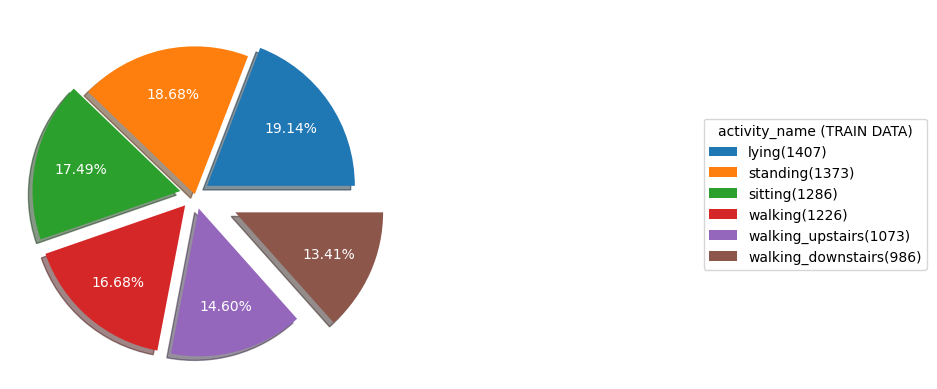

<Axes: xlabel='count', ylabel='activity_name'>

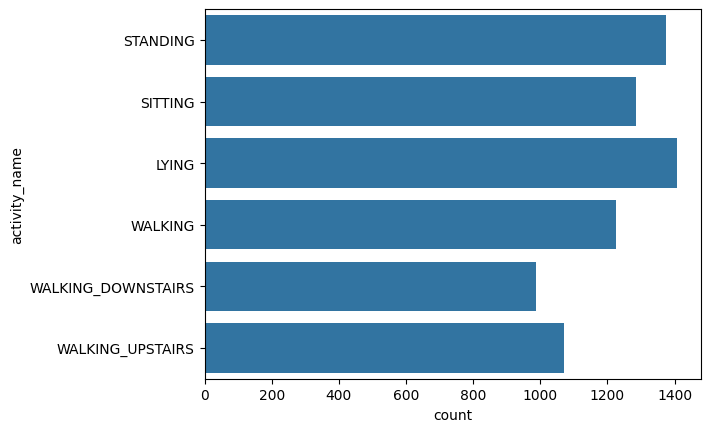

In [17]:
# parameters
activity_name = ["1407 lying(1407)","1373 standing(1373)","1286 sitting(1286)","1226 walking(1226)",
                 "1073 walking_upstairs(1073)","986 walking_downstairs(986)"]

# accessing elements
data = [float(x.split()[0]) for x in activity_name]
type= [x.split()[-1] for x in activity_name]

# creating plot
plt.pie(data, autopct='%1.2f%%',pctdistance=0.69, textprops=dict(color="w"),
        shadow=True,explode=(0.1,0.0,0.1,0.1,0.1,0.3))

#adding legend
plt.legend(type,
          title="activity_name (TRAIN DATA)",
          loc="right", bbox_to_anchor=(2, 0, 0.5, 1))


#showing plot
plt.show()
# count plot
sns.countplot(y='activity_name', data=train_df)

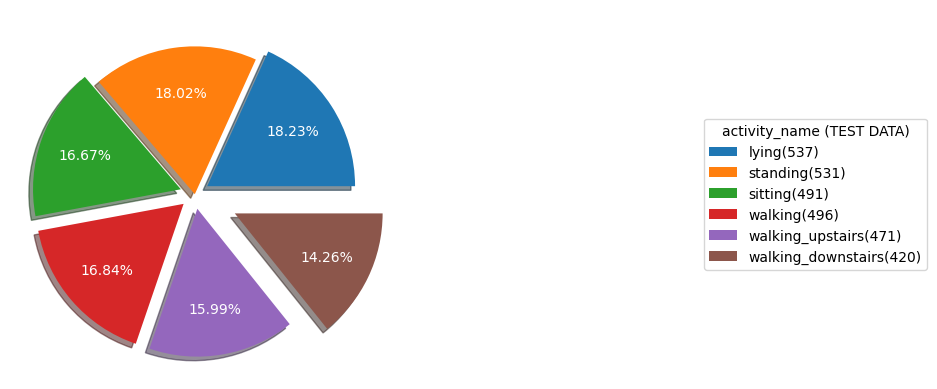

<Axes: xlabel='count', ylabel='activity_name'>

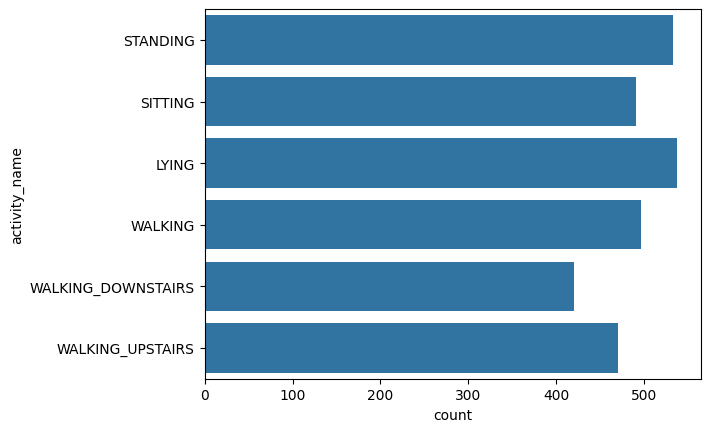

In [18]:
# parameters
activity_name = ["537 lying(537)","531 standing(531)","491 sitting(491)",
                 "496 walking(496)","471 walking_upstairs(471)",
                 "420 walking_downstairs(420)"]

# accessing elements
data = [float(x.split()[0]) for x in activity_name]
type= [x.split()[-1] for x in activity_name]

# creating plot
plt.pie(data, autopct='%1.2f%%',pctdistance=0.69, textprops=dict(color="w"),
        shadow=True,explode=(0.1,0.0,0.1,0.1,0.1,0.3))

#adding legend
plt.legend(type,
          title="activity_name (TEST DATA)",
          loc="right", bbox_to_anchor=(2, 0, 0.5, 1))


#showing plot
plt.show()
# count plot
sns.countplot(y='activity_name', data=test_df)

#### Indepedent variable

In [19]:
print(train_df.columns)

# tBodyAccMag-mean() vs angle(X,gravityMean)
x = train_df['tBodyAccMag-mean()']  # Verify this column name exists in your DataFrame
y = train_df['angle(X,gravityMean)']  # Adjusted to the correct column name

output_notebook()

p = figure(title="tBodyAccMag-mean() vs angle(X,gravityMean)", x_axis_label='tBodyAccMag-mean()', y_axis_label='angle(X,gravityMean)')
p.scatter(x, y, size=3, fill_color='green', fill_alpha=0.6, line_color='green')
show(p)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'activity',
       'subject_id', 'activity_name'],
      dtype='object', length=564)


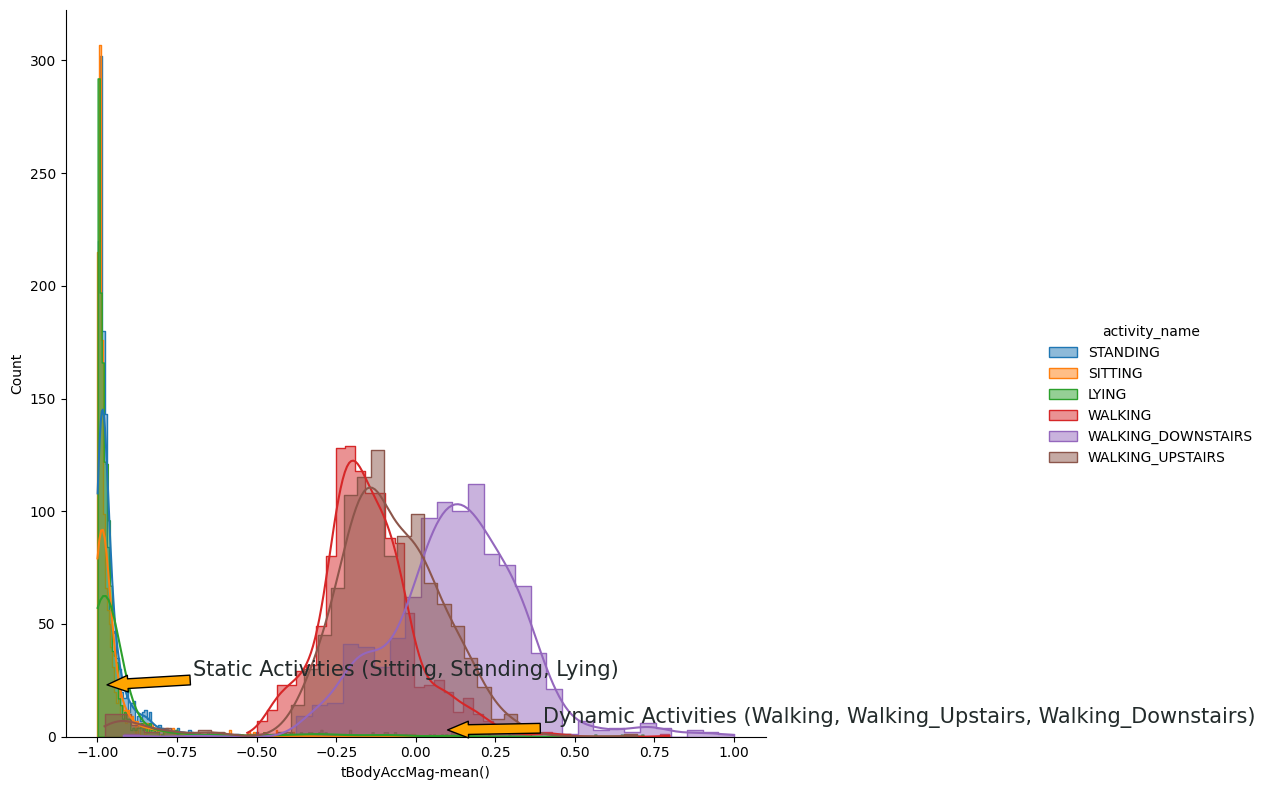

In [20]:
# understanding tBodyAccMag-mean()
facetgrid = sns.FacetGrid(data=train_df, hue="activity_name", height=8)  # Changed 'size' to 'height'
facetgrid.map(sns.histplot, "tBodyAccMag-mean()", kde=True, element='step').add_legend()  # Changed from 'distplot' to 'histplot' with 'kde'
plt.annotate('Static Activities (Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
             arrowprops=dict(facecolor='orange', width=7, headlength=15), size=15, color="#232b2b")
plt.annotate('Dynamic Activities (Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
             arrowprops=dict(facecolor='orange', width=7, headlength=15), size=15, color="#232b2b")
plt.show()


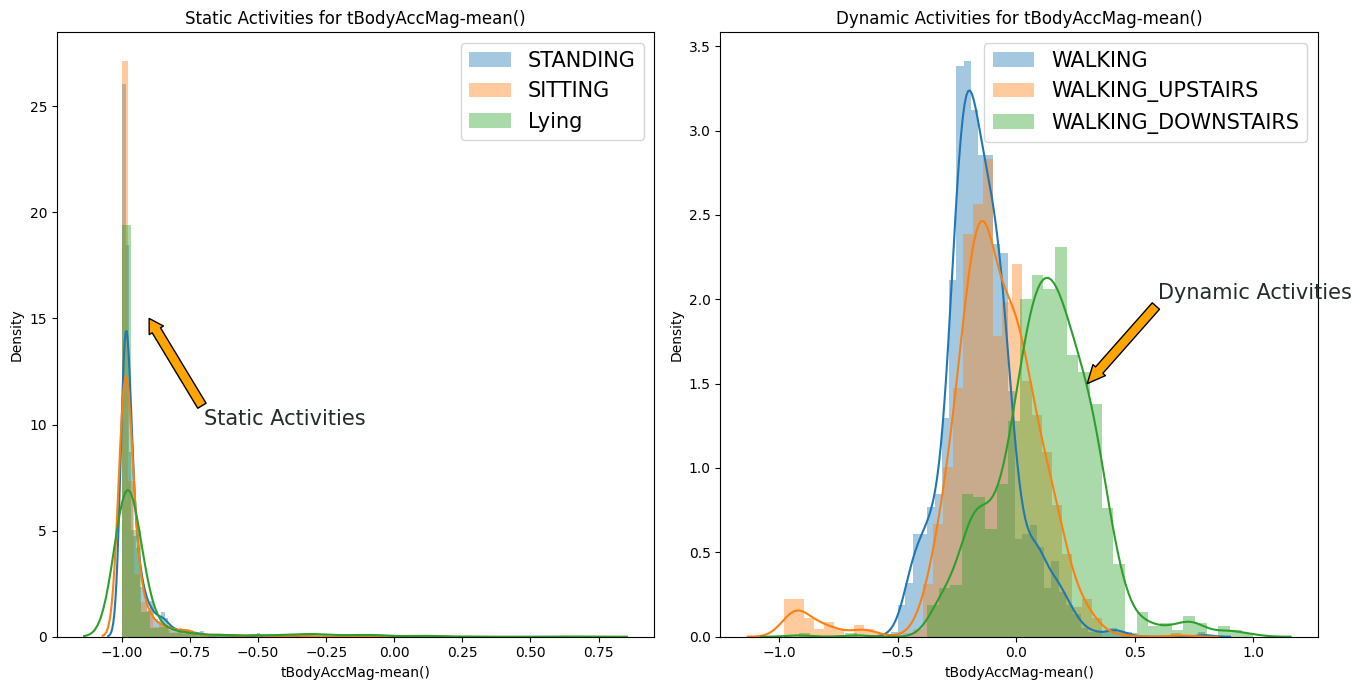

In [21]:
#Plotting "tBodyAccMagmean" for both static and dynamic activites separately to analysis them in more detail
df_standing = train_df[train_df["activity_name"] == "STANDING"]
df_sitting = train_df[train_df["activity_name"] == "SITTING"]
df_lying = train_df[train_df["activity_name"] == "LYING"]
df_walking = train_df[train_df["activity_name"] == "WALKING"]
df_walking_upstairs = train_df[train_df["activity_name"] == "WALKING_UPSTAIRS"]
df_walking_downstairs = train_df[train_df["activity_name"] == "WALKING_DOWNSTAIRS"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))
#STASTIC ACTIVITY
axes[0].set_title("Static Activities for tBodyAccMag-mean()")
sns.distplot(df_standing["tBodyAccMag-mean()"], hist = True, label = "STANDING", ax = axes[0])
sns.distplot(df_sitting["tBodyAccMag-mean()"], hist = True, label = "SITTING", ax = axes[0])
sns.distplot(df_lying["tBodyAccMag-mean()"], hist = True, label = "Lying", ax = axes[0])
axes[0].legend(fontsize = 15)
axes[0].annotate('Static Activities', xy=(-0.90, 15), xytext=(-0.7,10),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 10), size = 15, color = "#232b2b")
# DYNAMMIC ACTIVITY
axes[1].set_title("Dynamic Activities for tBodyAccMag-mean()")
sns.distplot(df_walking["tBodyAccMag-mean()"],hist=True, label = "WALKING", ax = axes[1])
sns.distplot(df_walking_upstairs["tBodyAccMag-mean()"],hist=True, label = "WALKING_UPSTAIRS", ax = axes[1])
sns.distplot(df_walking_downstairs["tBodyAccMag-mean()"], hist = True, label = "WALKING_DOWNSTAIRS", ax = axes[1])
axes[1].legend(fontsize = 15)
axes[1].annotate('Dynamic Activities', xy=(0.3, 1.5), xytext=(0.60,2),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")

plt.tight_layout()
plt.show()

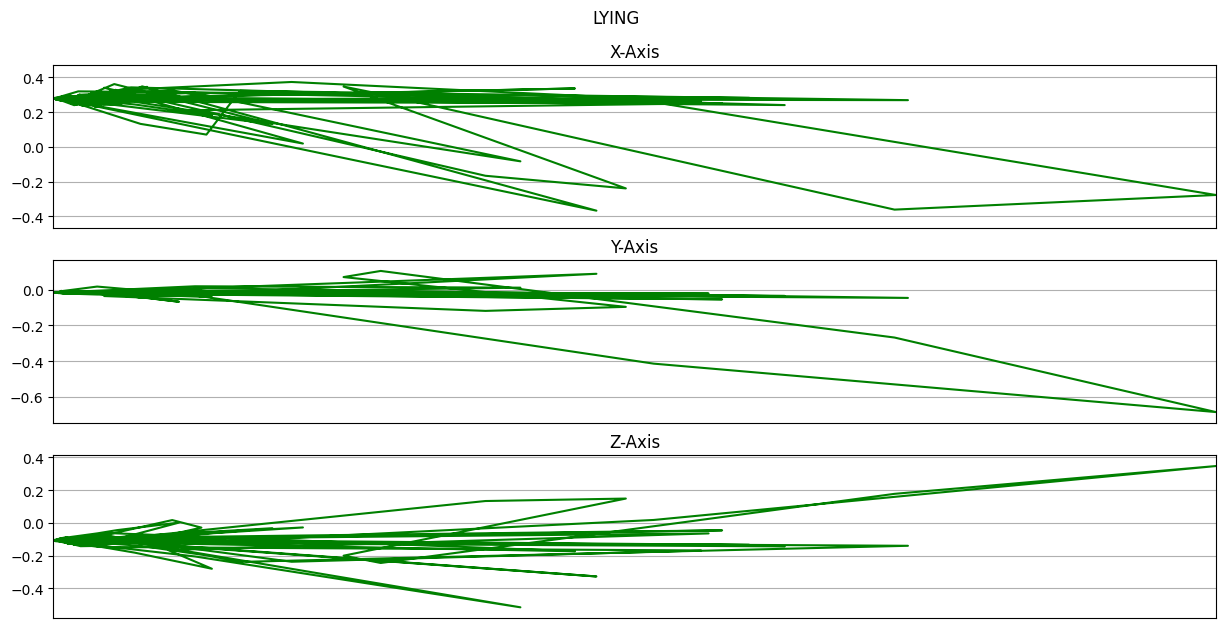

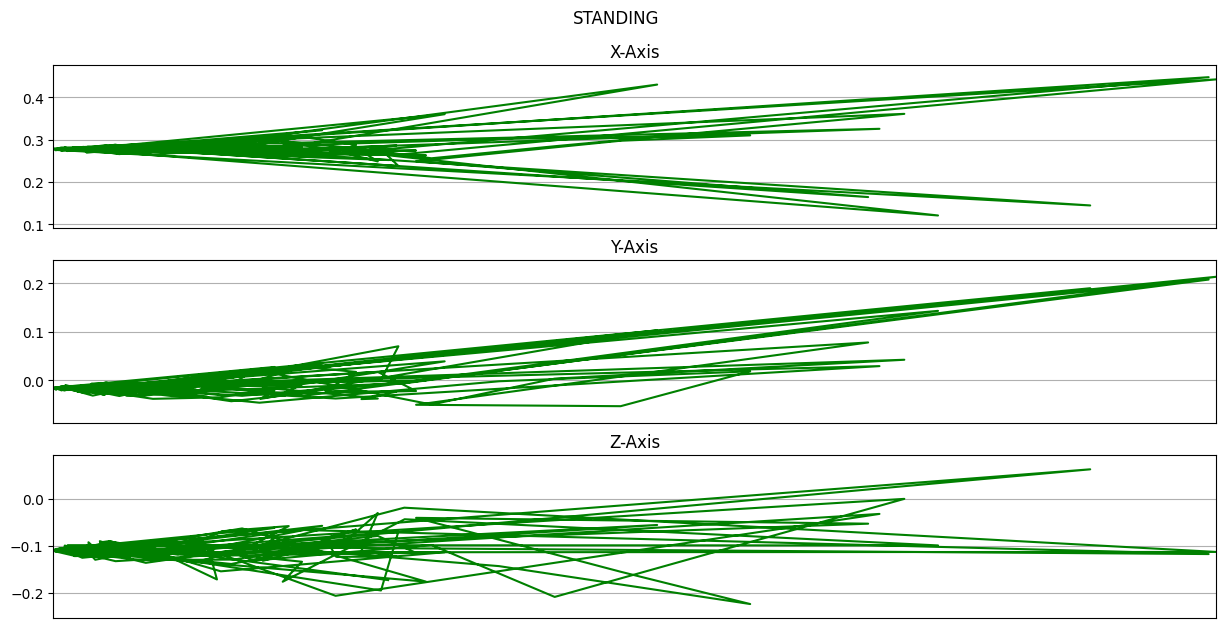

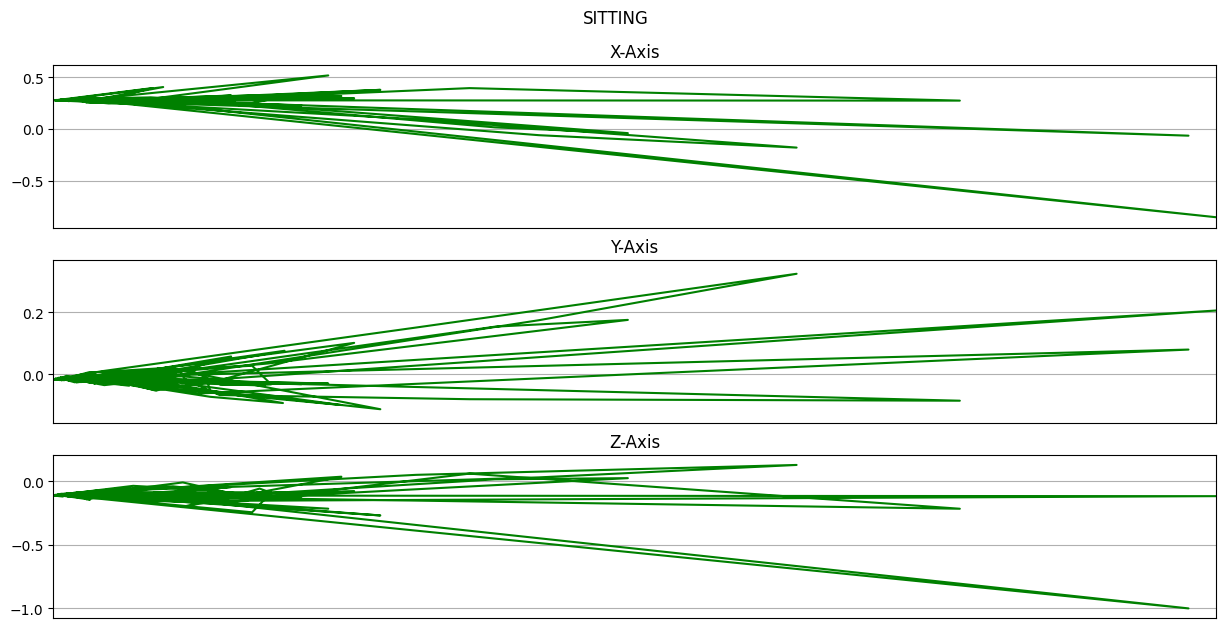

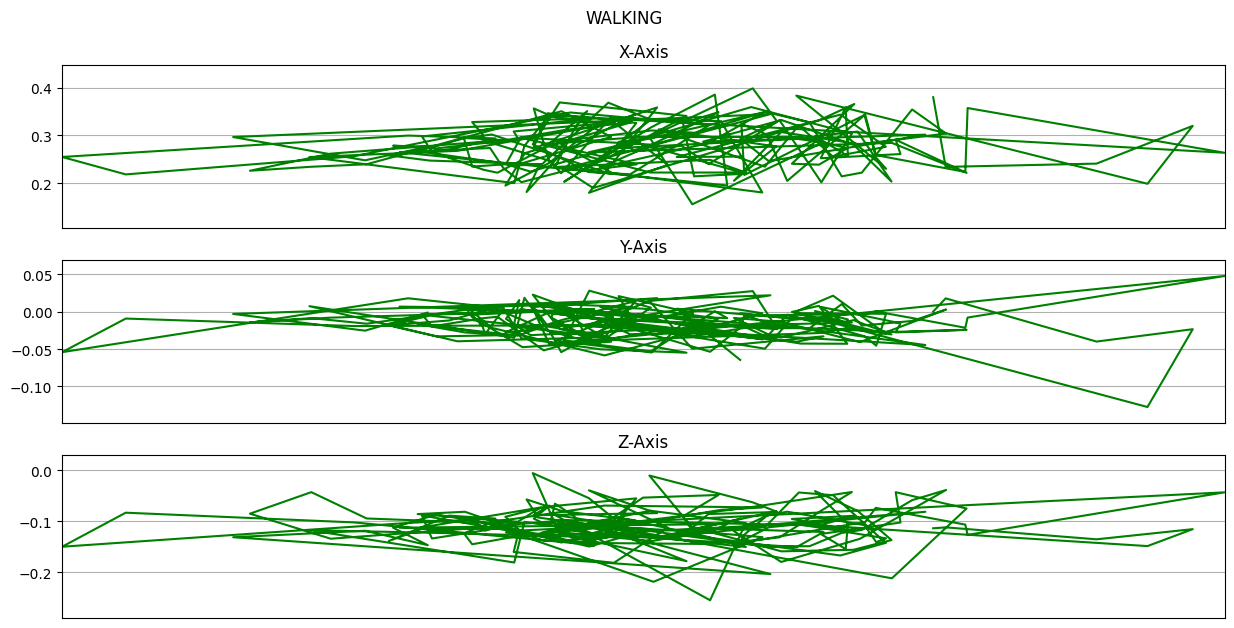

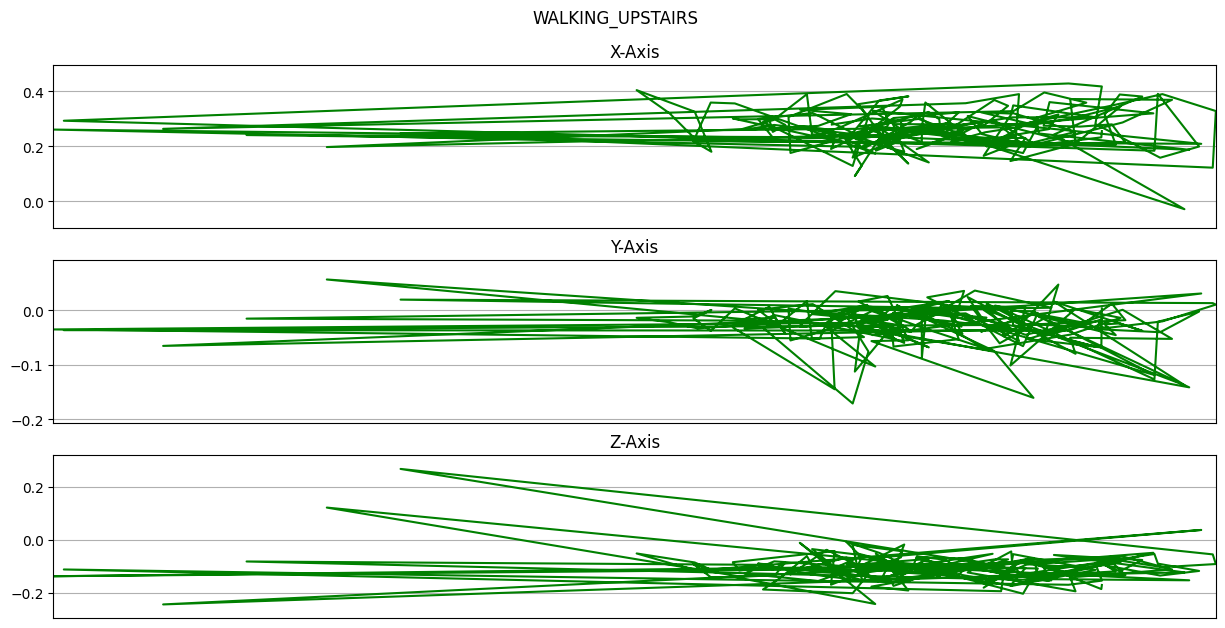

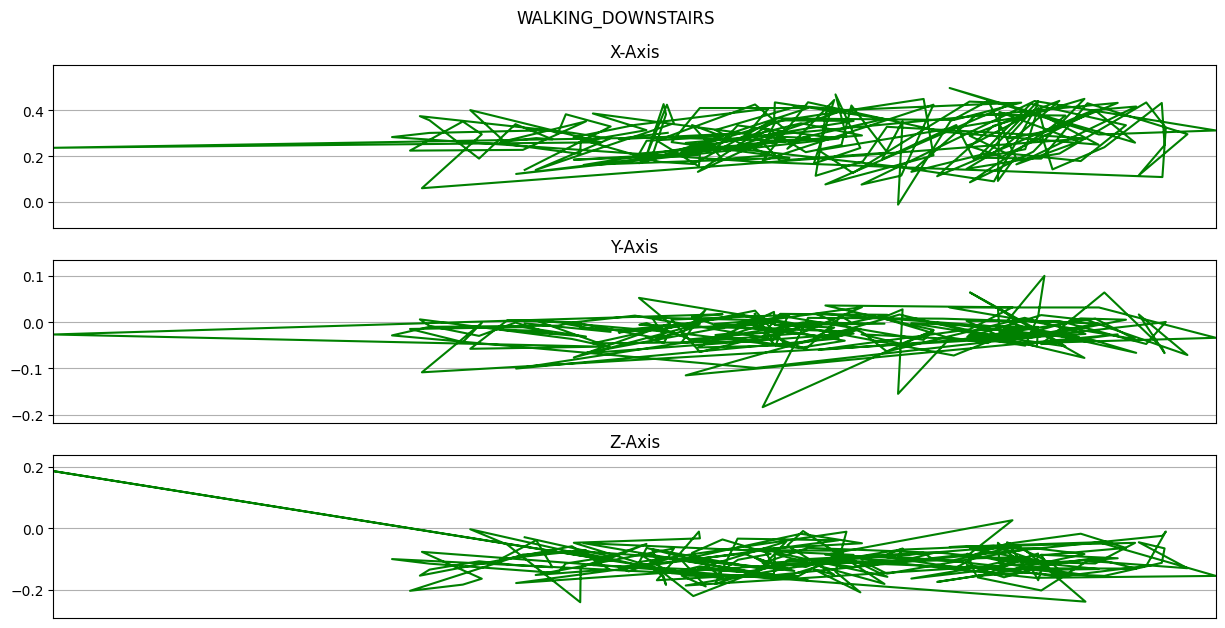

In [22]:
Fs=20
activities =train_df['activity_name'].value_counts().index
activities

def plot_activity(activity, train_df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-X'], 'X-Axis')
    plot_axis(ax1, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-Y'], 'Y-Axis')
    plot_axis(ax2, train_df['tBodyAccMag-sma()'], train_df['tBodyAcc-mean()-Z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity_name)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity_name in activities:
    data_for_plot = train_df[(train_df['activity_name'] == activity_name)][:Fs*10]
    plot_activity(activity_name, data_for_plot)

In [23]:
# Print all column names to find close matches
for col in train_df.columns:
    if "tBodyGyroJerk-correlation" in col or "tGravityAcc-entropy" in col:
        print(col)


tGravityAcc-entropy()-X
tGravityAcc-entropy()-Y
tGravityAcc-entropy()-Z
tBodyGyroJerk-correlation()-X,Y
tBodyGyroJerk-correlation()-X,Z
tBodyGyroJerk-correlation()-Y,Z


In [24]:
# Correct column names
x = train_df['tBodyGyroJerk-correlation()-X,Y']
y = train_df['tGravityAcc-entropy()-X']

# Output to static HTML file or Jupyter Notebook
output_notebook()

# Create a plot with the corrected data using updated parameter names
p = figure(width=400, height=400)  # Updated parameter names
p.circle(x, y, size=10, color="navy", alpha=0.2)
show(p)


In [25]:
x=train_df['tBodyGyro-correlation()-Y,Z']
y=train_df['tBodyAccJerk-correlation()-X,Y']

bins = hexbin(x, y, 0.1)
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False
p.hex_tile(q="q", r="r", size=1.06, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))
output_notebook()
show(p)

In [26]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pd.crosstab(train_df['tBodyGyroJerk-correlation()-X,Y'], train_df['tGravityAcc-entropy()-X'])
print (ct1)

# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


contingency table of observed counts
tGravityAcc-entropy()-X          -1.000000  -0.979400  -0.963711  -0.949894  \
tBodyGyroJerk-correlation()-X,Y                                               
-0.895269                                0          0          0          0   
-0.864228                                0          0          0          0   
-0.859497                                0          0          0          0   
-0.843749                                1          0          0          0   
-0.828483                                1          0          0          0   
...                                    ...        ...        ...        ...   
 0.856028                                0          0          0          0   
 0.856308                                0          0          0          0   
 0.863211                                1          0          0          0   
 0.903738                                0          0          0          0   
 1.000000     

In [27]:
# contingency table of observed counts
print('\ncontingency table of observed counts')
ct1=pd.crosstab(train_df['tBodyGyro-correlation()-Y,Z'], train_df['tBodyAccJerk-correlation()-X,Y'])
print (ct1)

# column percentages
print('\ncolumn percentages')
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('\nchi-square')
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


contingency table of observed counts
tBodyAccJerk-correlation()-X,Y  -1.000000  -0.986457  -0.979055  -0.933986  \
tBodyGyro-correlation()-Y,Z                                                  
-1.000000                               0          0          0          0   
-0.999977                               0          0          0          0   
-0.997599                               0          0          0          0   
-0.997079                               0          0          0          0   
-0.996259                               0          0          0          0   
...                                   ...        ...        ...        ...   
 0.978494                               0          0          0          0   
 0.986067                               0          0          0          0   
 0.996186                               0          0          0          0   
 0.997098                               0          0          0          0   
 1.000000                 

### PART-3 (ML)

In [28]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

In [29]:
x_test = test_df.drop(["subject_id","activity","activity_name"], axis = 1)
y_test = test_df["activity"]

In [30]:
print(train_df.shape)
print(train_df1.shape)

print(test_df.shape)
print(test_df1.shape)

(7351, 564)
(7351, 1)
(2946, 564)
(2946, 1)


In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

#### Meta-learning (Stacking ensemble)

In [32]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)"])
def evaluating_model(model_name, accuracy):
    global table
    new_row = pd.DataFrame([[model_name, accuracy]], columns=["Model", "Accuracy(%)"])
    table = pd.concat([table, new_row], ignore_index=True)


def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "tab20b", annot =True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 15)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()

def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    print('Accuracy')
    print(str(accuracy)+"%\n")

    print(' Best Estimator')
    print("{}\n".format(cross_val.best_estimator_))

    print(' Best Hyper-Parameters')
    print(cross_val.best_params_)
    evaluating_model(model_name, accuracy)
    print_confusionMatrix(y_test, predicted_points)

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:46.096084

Accuracy
91.96%

 Best Estimator
LogisticRegression(C=1, multi_class='ovr')

 Best Hyper-Parameters
{'C': 1, 'penalty': 'l2'}


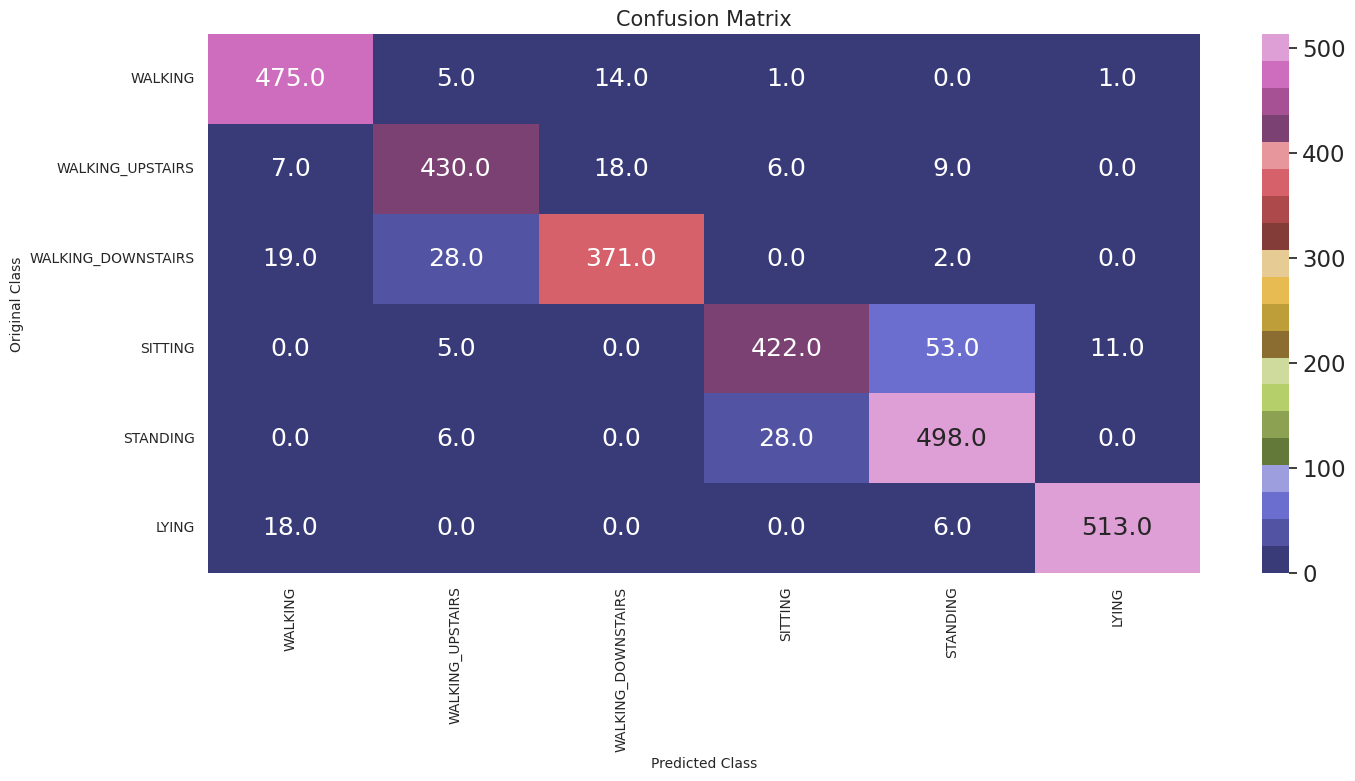

In [33]:
# logistic regression
from sklearn.linear_model import LogisticRegression
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:49.248946

Accuracy
83.94%

 Best Estimator
DecisionTreeClassifier(max_depth=7)

 Best Hyper-Parameters
{'max_depth': 7}


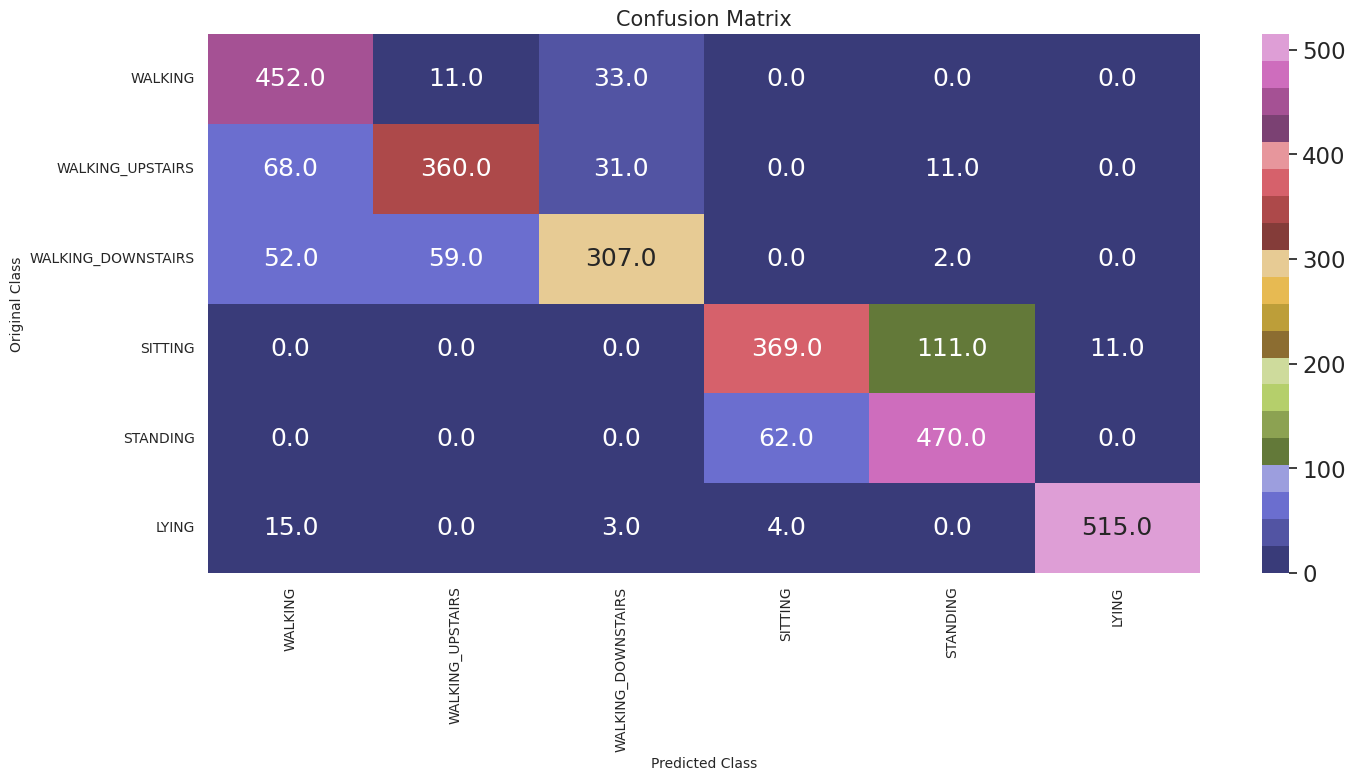

In [34]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Decision Trees")

#### Model Comparision

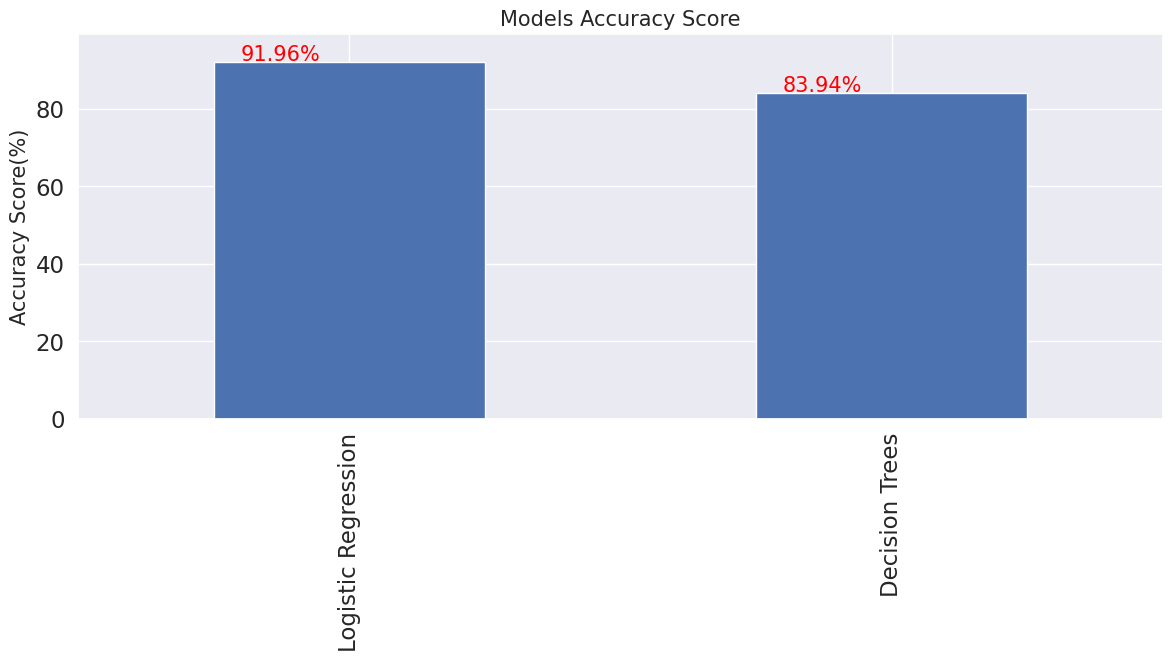

,Model,Accuracy(%)
0,Logistic Regression,91.96
1,Decision Trees,83.94


In [35]:
ax = table.plot(x = "Model", y = "Accuracy(%)", kind = "bar", figsize = (14, 5), legend = False)
plt.title("Models Accuracy Score", fontsize = 15)
plt.xlabel("")
plt.margins(x = 0, y = 0.08)
plt.ylabel("Accuracy Score(%)", fontsize = 15)
#plt.grid(visible = True)
for i in ax.patches:
    ax.text(x = i.get_x()+0.05, y = i.get_height()+0.5, s = str(i.get_height())+"%", fontsize = 15, color = "red")
plt.show()
table

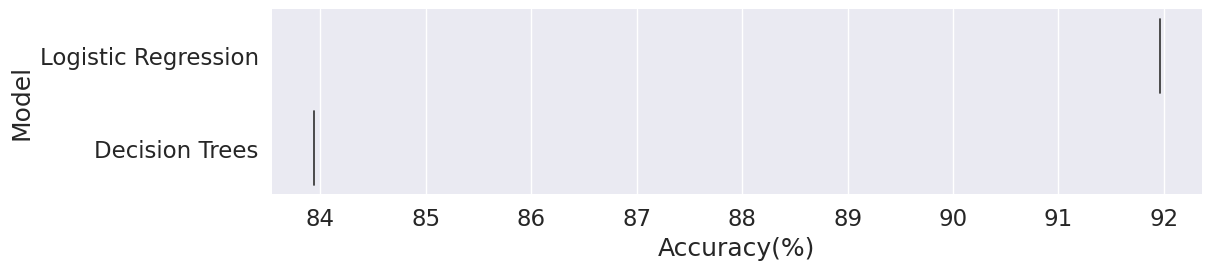

In [36]:
# @title Model vs Accuracy(%)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(table['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(table, x='Accuracy(%)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### We used decision tree just for comparison.
#### Our Main Model is logistic regression.

In [57]:
import joblib

# Save the model to disk
joblib.dump(cross_val.best_estimator_, '/content/drive/My Drive/Dataset/logistic_regression_model.pkl')


['/content/drive/My Drive/Dataset/logistic_regression_model.pkl']

#### Reading Data

In [37]:
import numpy as np
data = np.load('train_label.npy')
print(data)

[[False False False False  True False]
 [False False False False  True False]
 [False False False False  True False]
 ...
 [False  True False False False False]
 [False  True False False False False]
 [False  True False False False False]]


In [38]:
data1=np.load("test_label.npy")
print(data1)

[[False False False False  True False]
 [False False False False  True False]
 [False False False False  True False]
 ...
 [False  True False False False False]
 [False  True False False False False]
 [False  True False False False False]]


In [39]:
data2=np.load("test.npy")
print(data2)

[[[ 1.165315e-02 -2.939904e-02  1.068262e-01 ...  1.041216e+00
   -2.697959e-01  2.377977e-02]
  [ 1.310909e-02 -3.972867e-02  1.524549e-01 ...  1.041803e+00
   -2.800250e-01  7.629271e-02]
  [ 1.126885e-02 -5.240586e-02  2.168462e-01 ...  1.039086e+00
   -2.926631e-01  1.474754e-01]
  ...
  [ 1.291511e-03  1.173502e-02  3.665587e-03 ...  9.930164e-01
   -2.599865e-01  1.443951e-01]
  [ 1.469997e-03  9.517414e-03  4.041945e-03 ...  9.932414e-01
   -2.620643e-01  1.447033e-01]
  [ 2.573841e-03  7.305069e-03  4.888436e-03 ...  9.943906e-01
   -2.641348e-01  1.454939e-01]]

 [[ 9.279629e-03  6.650520e-03 -2.631933e-02 ...  9.991921e-01
   -2.649349e-01  1.256164e-01]
  [ 4.929711e-03  1.864973e-02 -2.688753e-02 ...  9.946787e-01
   -2.532142e-01  1.256249e-01]
  [ 3.953596e-03  1.553950e-02 -3.663861e-02 ...  9.935518e-01
   -2.565887e-01  1.163814e-01]
  ...
  [ 7.787600e-03  4.730625e-03  1.412899e-02 ...  1.001861e+00
   -2.619359e-01  1.527878e-01]
  [ 3.433489e-03 -4.619849e-03  1.33

In [63]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

def preprocess_new_data(new_data):
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    new_data_imputed = imputer.fit_transform(new_data)
    return pd.DataFrame(new_data_imputed, columns=new_data.columns)


In [64]:
import joblib

# Load the trained logistic regression model
model_path = '/content/drive/My Drive/Dataset/logistic_regression_model.pkl'  # Adjust path as needed
model = joblib.load(model_path)

# Function to predict activities
def predict_activity(new_data_raw, model):
    # Preprocess the new data
    new_data_processed = preprocess_new_data(new_data_raw)
    # Predict using the logistic regression model
    predictions = model.predict(new_data_processed)
    # Convert numeric predictions to labels (optional, based on your setup)
    activity_labels = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LYING"}
    predicted_labels = [activity_labels.get(pred, "Unknown") for pred in predictions]
    return predicted_labels


In [87]:
# Create mock data (assuming each feature is numeric)
# This should mimic the structure of your training data
mock_data = np.random.rand(1, 561)  # Create five sample with 561 features
mock_data_df = pd.DataFrame(mock_data, columns=train_df.columns[:-3])  # Exclude 'activity', 'subject_id', 'activity_name'

# print(mock_data_df)
# Predict activities using the mock data
predicted_activities = predict_activity(mock_data_df, model)
print("\n\nPredicted Activities:", predicted_activities)




Predicted Activities: ['LYING']


end